<a href="https://colab.research.google.com/github/zzhining/deeplearning/blob/master/deeplearning/ilifo_class/ch20-1_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 치매환자의 뇌인지 일반인의 뇌인지 예측

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

### 1. 학습용 이미지 데이터의 수 확장(ImageDataGenerator)
 - rescale: 이미지 크기를 바꿈(0~1)
 - horizontal_flip, vertical_flip: 이미지를 수평 or 수직으로 뒤집음
 - zoom_range: 정해진 범위 안에서 축소 또는 확대
 - width_shift, height_shift: 정해진 범위 안에서 그림을 수평 또는 수직으로 랜덤하게 평행 이동
 - rotation_range: 정해진 각도만큼 이미지 회전
 - shear_range: 좌표 하나를 고정시키고, 다른 몇 개의 좌표를 이동시킴
 - fill_mode: 빈공간을 어떻게 채울지 결정(nearest옵션: 가장 비슷한 색으로 채워짐)

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

In [3]:
# !unzip colab_train_test.zip

### 학습용 이미지 데이터 업로드(flow_from_directory)

In [4]:
train_generator = train_datagen.flow_from_directory(
       './train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.


### 테스트용 이미지 데이터 정규화(ImageDataGenerator)

In [5]:
#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

### 테스트용 이미지 데이터 업로드(flow_from_directory)

In [6]:
test_generator = test_datagen.flow_from_directory(
       './test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 120 images belonging to 2 classes.


## 모델 생성

In [7]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

## 모델 컴파일

In [8]:
#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

## 모델 실행

In [9]:
#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
 32/100 [========>.....................] - 6s 175ms/step - loss: 0.6944 - accuracy: 0.5250 - val_loss: 0.6942 - val_accuracy: 0.4800


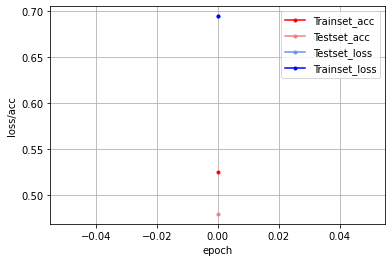

In [11]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()